### 1. Import Data from Web Crawling

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

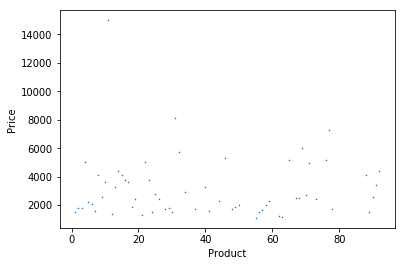

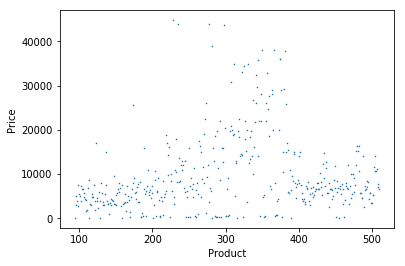

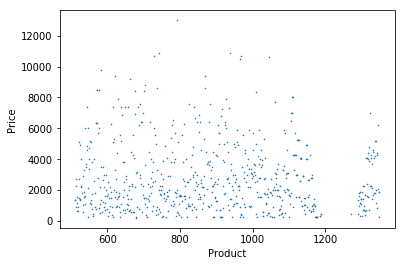

In [279]:
# HKTVMall
data = pd.read_csv('Products_HKTVMall.csv')
# data = pd.read_csv('Products_Suning.csv')
data.head()

is_tl = data['product_type'] == 'tablet'
is_lp = data['product_type'] == 'laptop'
is_sp = data['product_type'] == 'smartphone'



a = data[(data.product_type == 'tablet') & (data.product_price > 1000)]
plt.xlabel('Product')
plt.ylabel('Price')
plt.plot(a.product_price, '*', markersize=1)
# a = plt.plot(data[is_tl]['product_price'] , '*', markersize=1)
plt.figure()
plt.xlabel('Product')
plt.ylabel('Price')
b = plt.plot(data[(data.product_type == 'laptop')].product_price, '*', markersize=1)

# data[(data.product_type == 'tablet') & (data.product_price > 1000)]
plt.figure()
plt.xlabel('Product')
plt.ylabel('Price')
c = plt.plot(data[(data.product_type == 'smartphone') & (data.product_price > 200)].product_price, '*', markersize=1)
# c = plt.plot(data[is_sp]['product_price'], '*', markersize=1)


##Remove Accessories

In [280]:
cust_data = pd.read_csv('Customers_HKTVMall.csv')
prod_data = pd.read_csv('Products_HKTVMall_update.csv')
customer_comments_records = cust_data['product_index'].value_counts()
customer_comments_records

#Get all commented product from customer data
# np.array(customer_comments_records.index)

#get avg rates from customers
stats_dict = {}
for i in customer_comments_records.index:
    stats_dict[i] = [cust_data[cust_data.product_index == i].user_rate.median(), cust_data[cust_data.product_index == i].user_rate.mean()]

stats = pd.DataFrame(stats_dict).T
stats.columns = ['median_rates', 'mean_rates']

stats["no_of_rates"] = np.nan

temp = prod_data[['product_index', 'no_of_rates']].set_index('product_index')

temp[temp.no_of_rates != 0]


,no_of_rates
product_index,
NaN,NaN
H6588001_S_Samsung_TabA_8_2019_WiFi,2.0
H6800001_S_BGT0026,1.0
H0972006_S_F7,17.0
H6588001_S_Huawei_M5_Lite_8_LTE,1.0
H5023001_S_80U1002HHH_256,1.0
H6588001_S_Huawei_M5Pro_Gold,2.0
H5912001_S_T0044_bk,4.0
H0710001_S_STM-222-200JW-01,1.0


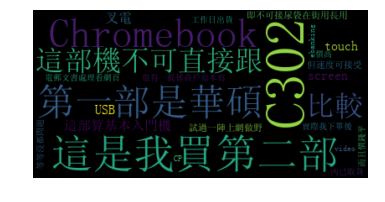

In [281]:
data = pd.read_csv('Customers_HKTVMall.csv')
text = data.buyer_comment[22]
wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Grouping Items by Name 

## Grouping Algorithm

- Cosine similarity

In [282]:
import textdistance
import re

threshold = 0.8
regex_filter = '[\(\-\)（）\[\]—\/]|香港行貨|平行進口|水貨'

def group_by_text_similarity(item_name = []):
    all_matches = []
    while len(item_name) > 0:
        match = []
        match.append(item_name[0])
        temp = re.sub(regex_filter, ' ', item_name[0])
        item_name.pop(0)
        i = 0
        while len (item_name) > 0:
            if i == len(item_name):
                break
            processed_str = re.sub(regex_filter, ' ', item_name[i])
            if textdistance.cosine(processed_str , temp) > threshold:
                match.append(item_name[i])
#                 print(processed_str)
#                 print(temp)
                item_name.pop(i)
            else:
                i+=1
        all_matches.append(match)
    return all_matches

### Smart Phone Grouping

In [283]:
data = pd.read_csv('Products_HKTVMall.csv')
smartphone_filtered = data[(data.product_type == 'smartphone') & (data.product_price > 298) & (~data.product_name.str.contains('更換|AirPods', regex=True))].product_name.values.tolist()
matches = group_by_text_similarity(smartphone_filtered)

index = 0
for i in matches:
    if len(i) > 1:
        index+=1
print(f"Total Groupings: {index}")

Total Groupings: 126


### Tablets Grouping

In [284]:
data = pd.read_csv('Products_HKTVMall.csv')
tablet_filtered = data[(data.product_type == 'tablet') & (data.product_price > 0) & (~data.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))].product_name.values.tolist()
matches = group_by_text_similarity(tablet_filtered)

index = 0
for i in matches:
    if len(i) > 1:
        index+=1

print(f"Total Groupings: {index}")

Total Groupings: 17


### Laptop Grouping

In [285]:
data = pd.read_csv('Products_HKTVMall.csv')
laptop_filtered = data[(data.product_type == 'laptop') & (data.product_price > 0) & (~data.product_name.str.contains('智能筆', regex=True))].product_name.values.tolist()
matches = group_by_text_similarity(laptop_filtered)

index = 0
for i in matches:
    if len(i) > 1:
        index+=1
print(f"Total Groupings: {index}")

Total Groupings: 88
